# EMPLOYEE EXIT SURVEYS

In this project, we will do somme analysis of employees resignation, based on two exit surveys provided by the Australian Government: 
- [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [Technical and Further Education (TAFE)](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) 

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We will combine the two surveys in order to answer the question.

In [1]:
### Importation of the libraries we will work with
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import seaborn as sns

In [2]:
### reading the datasets
tafe_survey = pd.read_csv('tafe_survey.csv')
dete_survey = pd.read_csv('dete_survey.csv')

## 1. DATA EXPLORATION

### 1.1 DETE SURVEY_data exploration
(Department of Education, Training and Employment)

In [3]:
### displaying the top 5 rows of DETE survey
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


From the informations above, we notice that : 
- There is some columns with a lot of missing values (Aboriginal,Torres Strait, South Sea, Disability, NESB)
- Some missing values are not represented as NaN. For example in the second row, the DETE start Date and Role Strat Date are represented as 'Not Stated)

In [4]:
### displaying some informations about non-null values
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

As expected, there is some columns with a high percentage of missing values : <br>
- Classification : 55 % of the values are missing
- Business Unit : 85 % 
- Aboriginal : 98 %  
- Torres Strait : 99.6 %
- South Sea : 99.2 %
- Disability : 97 %
- NESB : 96 %

There is missing values in other columns but in lower proportions.

In [5]:
dete_survey.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

### 1.2 TAFE SURVEY_data exploration
(Technical and Further Education)

In [6]:
### displaying the top 5 rows of TAFE survey
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From the informations above, we notice that : 
- The TAFE dataset have 72 columns
- We have categorical and numerical columns. 
- There is missing values identified as NaN, but we have also missing values identified with the string '-'. We we will replace those strings with NaN values in he data cleaning section.
- For our purpose, there is some rows that are not really interesting. For example, in the column "Reason for ceasing employement", we have some rows that are not about resignation (contract expired, retirement, etc). we will handle this later.


In [7]:
#sns.heatmap(tafe_survey.isnull(), cbar = False, figs)
# White = missing values
# Black = non missing

In [8]:
### displaying some useful informations on TAFE survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.isnull()
# False = non null, True = null

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


## 2. DATA CLEANING

### 2.1 DETE SURVEY_DATA CLEANING

###  2.1.1 DETE SURVEY_missing values

Recall that we identified the string 'Not Stated' to be a missing value. We should represent it as NaN to make the analysis easier.

In [10]:
### Example of rows before the replacement
dete_survey.iloc[1,3:5]

DETE Start Date    Not Stated
Role Start Date    Not Stated
Name: 1, dtype: object

In [11]:
### Replacing 'Not Stated' by NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [12]:
### Example of rows after the replacement
dete_survey.iloc[1,3:5]

DETE Start Date    NaN
Role Start Date    NaN
Name: 1, dtype: object

### 2.1.2 DETE SURVEY_irrelevant columns

There is some columns that are irrelevant for our analysis because they dont bring any useful informations. It is better to drop them to lighten our dataset and focus only on few columns.

In [13]:
### Some irrelevant columns to drop : 
dete_columns_to_drop = dete_survey.columns[28:49]
dete_columns_to_drop

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [14]:
### Dropping the irrelevant columns : 
dete_survey_updated = dete_survey.drop(dete_columns_to_drop, axis = 1) 

### 2.2 TAFE SURVEY_DATA CLEANING

### 2.2.1 TAFE SURVEY_irrelevant columns

In [15]:
### Some irrelevant columns to drop : 
tafe_columns_to_drop = tafe_survey.columns[17:66]
tafe_columns_to_drop

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [16]:
tafe_survey_updated = tafe_survey.drop(tafe_columns_to_drop, axis = 1)

### 2.3 MATCHING THE COLUMN NAMES

Some columns have different names in dete and tafe surveys but give us the same information. We will rename them with the same name. It will prevent us from having too many columns when we will merge the two datasets. Also, it will be easier to analyze later.<br>
See below the columns to match along with other columns we will use in our analysis.

|dete_survey|tafe_survey|definition|
|:-|:-|:-|
|ID|Record ID|An id used to identify the participant of the survey|
|SeparationType|Reason for ceasing employment|The reason why the participant's employment ended|
|Cease Date|CESSATION YEAR|The year or month the participant's employment ended|
|DETE Start Date||The year the participant began employment with the DETE|
||LengthofServiceOverall.<br>Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge.<br>Current Age|The age of the participant|
|Gender|Gender.<br>What is your Gender?|The gender of the participant|



In order to rename the columns, we can set some rules : 
- All letters in lowercase.
- No  whitespace at the beginning and at the end of strings.
- Spaces between strings will be replaced by underscores ('_').
    

In [17]:
### Updating the dete_survey columns 
dete_survey_updated.columns = (dete_survey_updated.columns.str.strip() # removes trailing spaces
                                                        .str.lower() 
                                                        .str.replace(' ','_')
                                                        .str.replace('.','')
                                                        .str.replace('(','')
                                                        .str.replace(')',''))

In [18]:
### Defining the new column names of tafe_survey
tafe_new_column_names = {'Record ID': 'id',
                    'CESSATION YEAR': 'cease_date',
                    'Reason for ceasing employment': 'separationtype',
                    'Gender. What is your Gender?': 'gender',
                    'CurrentAge. Current Age': 'age',
                    'Employment Type. Employment Type': 'employment_status',
                    'Classification. Classification': 'position',
                    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
### Renaming the columns of tafe_survey
tafe_survey_updated.rename(columns = tafe_new_column_names, inplace = True)
### Updating the tafe column names 
tafe_survey_updated.columns = (tafe_survey_updated.columns.str.strip()
                                                        .str.lower()
                                                        .str.replace(' ','_')
                                                        .str.replace('.','')
                                                        .str.replace('(','')
                                                        .str.replace(')',''))    
tafe_survey_updated

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


In [19]:
### Displaying the two datasets to see the changes : 
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [20]:
tafe_survey_updated.head()

,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,contributing_factors_maternity/family,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### 2.4 CONVERTING CEASE_DATE VALUES IN DETE_SURVEY

In [21]:
### Cleaning the cease_date column
dete_survey_updated["cease_date"].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
04/2014      2
07/2014      2
02/2014      2
04/2013      2
07/2006      1
09/2014      1
11/2012      1
2010         1
2014         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [22]:
### Splitting the months from the years
dete_survey_updated["cease_date"] = dete_survey_updated["cease_date"].str.split("/")

In [23]:
### Extracting the last character (year)
dete_survey_updated["cease_date"] = dete_survey_updated["cease_date"].str[-1]

In [24]:
### Converting into float type
dete_survey_updated["cease_date"] = dete_survey_updated["cease_date"].astype("float")

In [25]:
### Cheking the changes
dete_survey_updated["cease_date"].value_counts(ascending = True)

2006.0      1
2010.0      2
2014.0     51
2012.0    354
2013.0    380
Name: cease_date, dtype: int64

The years seems to have normal values (no outliers).

## 3. FILTERING THE DATA

## 3.1 TAFE SURVEY_filtering

Recall that our ojective is to understand the reasons of resignation.
If we look closer into our datasets we can notice that there is rows that are not about resignation. For example, in the tafe_survey dataset,column "separationtype", we have some rows that are not about resignation (contract expired, retirement, etc) : 

In [26]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

 We can filter the dataset to keep only the rows that are about resignation.

In [27]:
### Creating the filter
tafe_resignation_filter = tafe_survey_updated["separationtype"] == "Resignation"

In [28]:
### Filtering the dataset and reseting the index
tafe_resignation = tafe_survey_updated[tafe_resignation_filter].reset_index()

In [29]:
tafe_resignation

,index,id,institute,workarea,cease_date,separationtype,contributing_factors_career_move_-_public_sector,contributing_factors_career_move_-_private_sector,contributing_factors_career_move_-_self-employment,contributing_factors_ill_health,...,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,gender,age,employment_status,position,institute_service,role_service
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
2,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
3,6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
4,7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,...,-,-,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6
336,697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
337,698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
338,699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2


## 3.2 DETE SURVEY_filtering

In [30]:
### Displaying unique values in "separation type" column
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We have different values that are about resignation : "Resignation-Other reasons","Resignation-Other employer","Resignation-Move overseas/interstate". We will keep only the rows that contains one of those three strings. 

In [31]:
### Creating a regex pattern
dete_resignation_pattern = r"Resignation+"

In [32]:
### Creating a filter that match the pattern
dete_resignation_filter = dete_survey_updated["separationtype"].str.contains(dete_resignation_pattern)
dete_resignation_filter

0      False
1      False
2      False
3       True
4      False
       ...  
817    False
818    False
819     True
820    False
821     True
Name: separationtype, Length: 822, dtype: bool

In [33]:
### Filtering the dataset and reseting the index
dete_resignation = dete_survey_updated[dete_resignation_filter].reset_index()
dete_resignation

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,808,810,Resignation-Other reasons,2013.0,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,...,False,False,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
307,815,817,Resignation-Other employer,2014.0,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,...,False,False,False,Male,21-25,NaN,NaN,NaN,NaN,NaN
308,816,818,Resignation-Move overseas/interstate,2014.0,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,...,False,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
309,819,821,Resignation-Move overseas/interstate,2014.0,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN


## 3. DATA ANALYSIS

First lets answer to the following questions :
- Why do employees resign after a short period of work?
- Why do employees resign after a long period of work?

In order to do so, we will need to know the period of time an employee have been working. The information is available in our two datasets but we need to perform some calculations in order to extract it. <br>

- TAFE survey : period of work = institute_service
- DETE survey : period of work = cease_date - dete_start_date 

In [34]:
### Creating a new column "institue_service in DETE survey dataset"
dete_resignation["institute_service"] = dete_resignation["cease_date"] - dete_resignation["dete_start_date"] 

In [35]:
dete_resignation.head()

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
0,3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
1,5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
2,8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
3,9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
4,11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


Now that we have the period of work, we can look for the reason employees resign after a short/long period of work. <br>
For example, lets see if they resign because of some kind os disatisfaction.

### 3.1 IDENTIFYING DISSATISFIED EMPLOYEES

There is severam columns that are about dissatisfaction in our two datasets : <br> 

TAFE survey : 
- contributing_factors_dissatisfaction
- contributing_factors_job_dissatisfaction

DETE survey : 
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

We can set a simple rule : an employee is not satisfied when there is at least one of the dissatisfaction columns that is non null.<br>
We will create a column named "dissatisfied" in which a row will be True when at least of the rows of dissatisfaction columns is True. <br>
Lets start by the TAFE survey :

### 3.1.1 CREATING A DISSATISFACTION COLUMN IN TAFE SURVEY

In [36]:
tafe_resignation["contributing_factors_dissatisfaction"].value_counts(dropna= False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors_dissatisfaction, dtype: int64

In [37]:
tafe_resignation["contributing_factors_job_dissatisfaction"].value_counts(dropna= False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors_job_dissatisfaction, dtype: int64

We will transform the values into boolean type : 
- "-" = False
- Missing values(None or NaN) = NaN
- "Contributing Factors. Dissatisfaction" Or ""contributing_factors_job_dissatisfaction" = True

In [38]:
### Defining a function that convert the values in boolean type
def update_vals(value) :
    if value == "-":
        return False
    elif pd.isnull(value): # Detect missing values for an array-like object(NaN or None)
        return np.nan      # return NaN
    else:                  # When the value is not missing and not equal to "-"
        return True        

In [39]:
### Applying update_vals function to TAFE survey dissatisfaction columns
# we fist apply the function to the whole dataframe, then we select our columns
# df.applymap() method apply a function to a Dataframe elementwise.
tafe_dissatisfaction = tafe_resignation.applymap(update_vals)[["contributing_factors_dissatisfaction", "contributing_factors_job_dissatisfaction"]]
tafe_dissatisfaction

,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
335,False,False
336,False,False
337,False,False
338,False,False


In [40]:
### Creating a new column "dissatisfied" in tafe_resignation
# df.any() method returns False unless there is at least one element in the rows that is True 
tafe_resignation['dissatisfied'] = tafe_dissatisfaction.any(axis = 1) 
tafe_resignation['dissatisfied']

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Name: dissatisfied, Length: 340, dtype: bool

### 3.1.1 CREATING A DISSATISFACTION COLUMN IN DETE SURVEY

In the DETE survey dataset, the columns that are about dissatisfaction are already in boolean type. 

In [41]:
### Example of columns, notice that they are already in boolean type : 
dete_resignation[["job_dissatisfaction", "dissatisfaction_with_the_department","lack_of_recognition"]]

,job_dissatisfaction,dissatisfaction_with_the_department,lack_of_recognition
0,False,False,False
1,False,False,False
2,False,False,False
3,True,True,False
4,False,False,False
...,...,...,...
306,False,False,False
307,False,False,False
308,False,False,False
309,False,False,False


So no need to convert those values. we can directly create the "dissatisfied" column in dete_resignation.

In [42]:
### Selecting only the columns about dissatisfaction
dete_dissatisfaction = dete_resignation[["job_dissatisfaction",
                                          "dissatisfaction_with_the_department",
                                          "physical_work_environment",
                                          "lack_of_recognition",
                                          "lack_of_job_security",
                                          "work_location",
                                          "employment_conditions",
                                          "work_life_balance",
                                          "workload"]]
dete_dissatisfaction

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
306,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False
309,False,False,False,False,False,False,False,True,False


In [43]:
### Creating a new column "dissatisfied" in dete_resignation
# df.any() method returns False unless there is at least one element in the rows that is True 
dete_resignation['dissatisfied'] = dete_dissatisfaction.any(axis = 1) 
dete_resignation['dissatisfied']

0      False
1       True
2      False
3       True
4      False
       ...  
306    False
307    False
308    False
309     True
310    False
Name: dissatisfied, Length: 311, dtype: bool

### 3.2 COMBINING THE DATASETS

In [44]:
### Adding a column named "institute" in both datasets to helps us identifying them after the merge
dete_resignation["institute"] = "DETE" # all rows contain the string "DETE"
tafe_resignation["institute"] = "TAFE" # all rows contain the string "TAFE"

In [45]:
dete_resignation.shape

(311, 39)

In [46]:
tafe_resignation.shape

(340, 25)

In [47]:
### combining the two datsets
combined = pd.concat([dete_resignation,tafe_resignation], ignore_index = True)
combined

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,contributing_factors_ill_health,contributing_factors_maternity/family,contributing_factors_dissatisfaction,contributing_factors_job_dissatisfaction,contributing_factors_interpersonal_conflict,contributing_factors_study,contributing_factors_travel,contributing_factors_other,contributing_factors_none,role_service
0,3,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,696,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,5-6
647,697,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,1-2
648,698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,-,-,-,-,-,-,-,NaN
649,699,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,...,-,-,-,-,-,-,-,Other,-,1-2


In [48]:
### Checking non null values
combined.notnull().sum().sort_values()

torres_strait                                           0
south_sea                                               3
aboriginal                                              7
disability                                              8
nesb                                                    9
business_unit                                          32
classification                                        161
region                                                265
role_start_date                                       271
dete_start_date                                       283
role_service                                          290
none_of_the_above                                     311
workload                                              311
traumatic_incident                                    311
ill_health                                            311
study/travel                                          311
relocation                                            311
maternity/fami

In [49]:
### Droppting any column with less than 500 non null values (80% non null values)
combined_updated = combined.dropna(thresh=520, axis = 1)
combined_updated

,index,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...,...
646,696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


Next, we will transform the institute_service column to make it easier to analyse.<br> Then we will will convert the data into categories by using the following convention :
- New = period of work inferior to 3 years
- Experienced = period of work between 3 to 6 years
- Established = period of work between 7 to 10 years
- Veteran = period of work superior to 11 years

In [50]:
### Cheking the unique values
combined_updated['institute_service'].value_counts(dropna= False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [ ]:
### Extracting the values to make them uniform
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [52]:
combined_updated['institute_service_up'].value_counts(dropna= False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [53]:
### Creating a function to Converting the years into categories
def seniority (year):
    if year >= 11:
        return "Veteran"
    elif 7 <= year < 11:
        return "Established"
    elif 3 <= year < 7:
        return "Experienced"
    elif pd.isnull(year):
        return np.nan
    else:
        return "New"

In [ ]:
### Applyting the function above to the institute_service_up column and creating a new column "period_of_work"
combined_updated['period_of_work'] = combined_updated['institute_service_up'].apply(seniority)

# 3.3 ANALYSIS

In [55]:
### Checking the values in dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=True)

False    411
True     240
Name: dissatisfied, dtype: int64

In [59]:
### Calculating the percentage of employees who resigned for every period of work category
dissatisfied_p = combined_updated.pivot_table(index='period_of_work', values='dissatisfied')

<AxesSubplot:xlabel='period_of_work'>

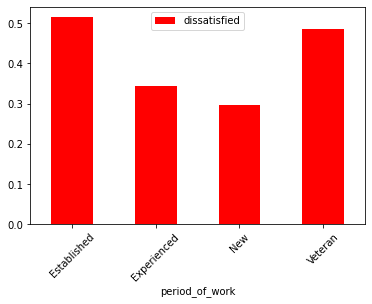

In [62]:
### Ploting the result
%matplotlib inline
dissatisfied_p.plot(kind='bar', rot=45, color = "red")

We can conclude from now that the longer the period of work, the more likely employees are to resign.